In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

/Users/jakubwasik/Documents/univeristy/machine-learning-2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
 

In [4]:
x_test = x_test.astype('float32') / 255
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
input_img = Input(shape=(784,))
 
encoded = Dense(encoding_dim, activation='relu')(input_img)
 
decoded = Dense(784, activation='sigmoid')(encoded)
 
autoencoder = Model(input_img, decoded)

In [6]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
 
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
 
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
 
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
#TODO configure the model to use a binary crossentropy loss and the Adam optimizer:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
 

In [10]:
#TODO complete fit(). As a starting point set epoch to 50, batch size to 256, shuffle data, and use x_test as a validation set.
#Later You can experiment with those values
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_test, x_test))
 
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1817 - val_loss: 0.1538
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1496 - val_loss: 0.1334
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1312 - val_loss: 0.1207
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1201 - val_loss: 0.1122
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1117 - val_loss: 0.1061
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1062 - val_loss: 0.1019
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1024 - val_loss: 0.0990
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0995 - val_loss: 0.0967
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0976 - val_loss: 0.0954
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0964 - val_loss: 0.0945
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0954 - val_loss: 0.0939
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

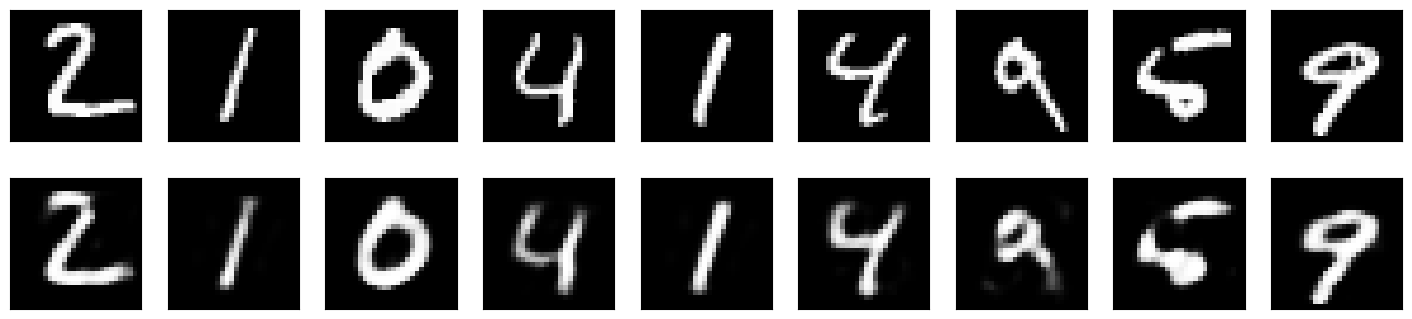

In [11]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [14]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
 
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
 
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
 
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
 
autoencoder = Model(input_img, decoded)
#TODO configure model to use a binary crossentropy loss, and the Adam optimizer:
 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#TODO complete fit(). Set epoch to 10, batch size to 128, shuffle data, and use x_test as a validation set.
#You can experiment with those values. If training takes a lot of time, try to reduce the number of epochs (but monitor loss value).
 
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))
 
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 0.3293 - val_loss: 0.1451
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.1394 - val_loss: 0.1234
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.1223 - val_loss: 0.1153
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.1150 - val_loss: 0.1109
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.1110 - val_loss: 0.1083
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.1083 - val_loss: 0.1054
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.1061 - val_loss: 0.1038
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.1047 - val_loss: 0.1023
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.1032 - val_loss: 0.1013
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - loss: 0.1026 - val_loss: 0.1004
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


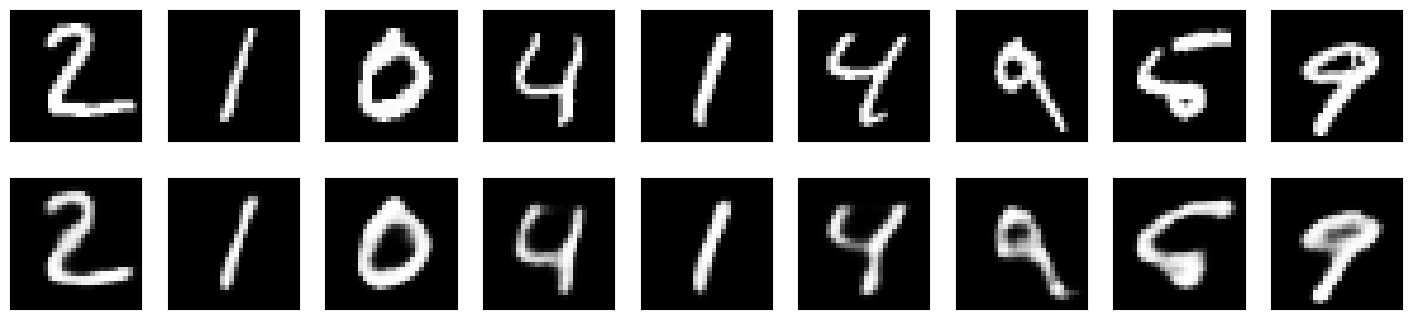

In [15]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()